# EVALUADOR DEL CLASIFICADOR DE VEHÍCULOS DAÑADOS

#### El objetivo principal de este script es medir la precisión y accuracy del modelo clasificador de vehículos dañados. Para ello se hará una regresión logística, y se mostrarán los resultados de test en una matriz de confusión.  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importar Librerías
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from cf_matrix import make_confusion_matrix
from sklearn.metrics import accuracy_score

import numpy as np
import h5py
import os, sys
import json
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
os.chdir("/content/drive/MyDrive/MasterMBD/ProyectoIMAGEN/CarInsurance") 
sys.path.append("/content/drive/MyDrive/MasterMBD/ProyectoIMAGEN/CarInsurance") 

In [ ]:
config={
  "model"           : "vgg16",
  "weights"         : "imagenet",
  "features_path"   : "car_damage_check/features.h5",
  "labels_path"     : "car_damage_check/labels.h5",
  "classifier_path" : "car_damage_check/classifier.pickle",
  "model_path"      : "cdd/car_damage_check/model",

  "test_size"       : 0.20,
  "seed"            : 9,
}

In [ ]:
# Configurar variables
test_size  = config["test_size"]
seed = config["seed"]
features_path = config["features_path"]
labels_path = config["labels_path"]
classifier_path = config["classifier_path"]

In [ ]:
# Importar features y etiquetas (labels)
h5f_data  = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string   = h5f_label['dataset_1']

features = np.array(features_string)
labels   = np.array(labels_string)

h5f_data.close()
h5f_label.close()

In [ ]:
labels.shape

(1712,)

In [ ]:
# Verificar la forma de los features y etiquetas (labels)
print ("[INFO] features shape: {}".format(features.shape))
print ("[INFO] labels shape: {}".format(labels.shape))

print ("[INFO] training ha empezado...")
# Separar los datos de training y test
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                  np.array(labels),
                                                                  test_size=test_size,
                                                                  random_state=seed)

print ("[INFO] Datos de training y testing separados...")
print ("[INFO] train data  : {}".format(trainData.shape))
print ("[INFO] test data   : {}".format(testData.shape))
print ("[INFO] train labels: {}".format(trainLabels.shape))
print ("[INFO] test labels : {}".format(testLabels.shape))

[INFO] features shape: (1712, 4096)
[INFO] labels shape: (1712,)
[INFO] training started...
[INFO] splitted train and test data...
[INFO] train data  : (1369, 4096)
[INFO] test data   : (343, 4096)
[INFO] train labels: (1369,)
[INFO] test labels : (343,)


In [ ]:
# Usar modelo de Regresión Logística
print ("[INFO] Creando modelo...")
model = LogisticRegression(max_iter=500)
model.fit(trainData, trainLabels)

[INFO] creating model...


LogisticRegression(max_iter=500)

In [ ]:
# Evaluar el modelo de datos de test (de regresión logística construido arriba)
preds = model.predict(testData)

In [ ]:
# Hacer un dump del clasificador a un archivo
print ("[INFO] Guardando el modelo...")
pickle.dump(model, open(classifier_path, 'wb'))

[INFO] saving model...


## Matriz de Confusión
### Con la matriz de confusión sacamos la precisión del modelo

In [ ]:
# Hacer un plot de la matriz de confusión
cm = confusion_matrix(testLabels, preds)

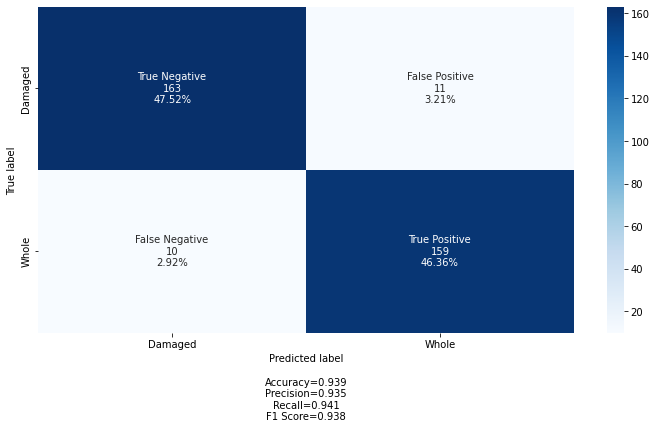

In [ ]:
categories = ['Damaged', 'Whole']
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm, figsize=(12,6), 
                      group_names=labels,
                      categories=categories)

De la matriz de confusión sacamos que el modelo tiene una accuracy de 93.9% y una precisión de 93.5%. 
Los resultados de el modelo de clasificación son muy buenos. El modelo acierta 93.88 veces de cada 100 vehículos que intenta clasificar con/sin daños.
